# Introductory Line to Natural Language Processing

- According to industry estimates, only 21% of the available data is present in structured form. Data is being generated as we speak, as we tweet, as we send messages on Whatsapp and in various other activities. Majority of this data exists in the textual form, which is highly unstructured in nature.


- Few notorious examples include – tweets / posts on social media, user to user chat conversations, **news, blogs and articles**, product or **services reviews** and patient records in the **Healthcare sector**.


- Despite having high dimension data, the information present in it is not directly accessible unless it is processed (read and understood) manually or analyzed by an automated system.


- In order to produce significant and actionable insights from text data, it is important to get acquainted with the techniques and principles of Natural Language Processing (NLP).

## List of things can NLP Do :-)

#### 1. Introduction to NLP

#### 2. Text Preprocessing

- [**Noise Removal**](#noise_removal): A general approach for noise removal is to prepare a dictionary of noisy entities to eliminate them from text
- [**Lexicon Normalization**](#lexicon_normalization): Another type of textual noise is about the multiple representations exhibited by single word
    - [Lemmatization](#lemmatization): Lemmatization is an organized & step by step procedure of obtaining the root form of the word
    - [Stemming](#stemming): Stemming is a rudimentary rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) - From a word
- [**Object Standardization**](#object_standardization) : Replace social media slangs from a text

#### 2.1 **from Speech**
- [**Speech to text**](#object_standardization) : Convert Speech or voice data into a text format


   
#### 3. Text to Features (Feature Engineering on text data)
- [**Syntactical Parsing**](#Syntactical Parsing): This involves the analysis of words for grammar and their arrangement in a manner that shows the relationships among the words
    - [Dependency Grammar](#Dependency Grammar): Dependency grammar is a class of syntactic text analysis that deals with (labeled) asymmetrical binary relations between two lexical items (words)
    - [Part of Speech Tagging](#Part of Speech Tagging): Apart from the grammar relations, every word in a sentence is also associated with a part of speech (pos) tag
- [**Entity Parsing**] (#Entity Parsing): Entity Detection algorithms are generally ensemble models of rule based parsing, dictionary lookups, pos tagging and dependency parsing
    - [Named Entity Recognition](#Named Entity Recognition): The process of detecting the named entities such as person names, location names, company names etc
    - [Topic Modelling](#Topic Modelling): a process of automatically identifying the topics present in a text corpus
    - [N-Grams](#N-Grams): A combination of N words together are called N-Grams. N grams (N > 1) are generally more informative as compared to words (Unigrams) as features.
- [**Statistical features**] (#Statistical features): 
    - [TF – IDF](#TF – IDF): TF-IDF is a weighted model. It aims to convert the text documents into vector models on the basis of occurrence of words in the documents without taking considering the exact ordering.
    - [Frequency / Density Features](#Frequency / Density Features): Some of the features are: _Word Count, Sentence Count, Punctuation Counts and Industry specific word counts_.
    - [Readability Features](#Readability Features): Other types of measures include __readability measures__ such as _syllable counts, smog index and flesch reading ease_

    
#### 4. Important tasks of NLP
- [**Text Classification**](#Text Classification): Email Spam Identification, topic classification of news, sentiment classification and organization of web pages by search engines
- [**Text Matching**](#Text Matching / Similarity): One of the important areas of NLP is the matching of text objects to find similarities.
    - [Levenshtein Distance](#Levenshtein Distance): the minimum number of edits needed to transform one string into the other
    - [Phonetic Matching](#Phonetic Matching): takes a keyword as input (person’s name, location name etc) and produces a character string that identifies a set of words that are (roughly) phonetically similar
    - [Flexible String Matching](#Flexible String Matching): A complete text matching system includes different algorithms pipelined together to compute variety of text variations
    - [Cosine Similarity](#Cosine Similarity): When the text is represented as vector notation, a general cosine similarity can also be applied in order to measure vectorized similarity
- [**Coreference Resolution**](#Coreference Resolution): a process of finding relational links among the words (or phrases) within the sentences

### 1. Introduction to Natural Language Processing

NLP is a branch of data science that consists of systematic processes for analyzing, understanding, and deriving information from the text data in a smart and efficient manner. By utilizing NLP and its components, one can organize the massive chunks of text data, perform numerous automated tasks and solve a wide range of problems such as – automatic summarization, machine translation, named entity recognition, relationship extraction, sentiment analysis, speech recognition, and topic segmentation etc.

Few terms that are used in the article:

   - Tokenization – process of converting a text into tokens
   - Tokens – words or entities present in the text
   - Text object – a sentence or a phrase or a word or an article


In [65]:
import nltk 

## 2. Text Preprocessing
Since, text is the most unstructured form of all the available data, various types of noise are present in it and the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as text preprocessing.

It is predominantly comprised of three steps:

   - **Noise Removal**          - ('a','an','I','to',etc)
   - **Lexicon Normalization**  - (Suffix or Prefix that are addition to the root words)
   - **Object Standardization** - (Words that aren't even exist in dictionary but that are there in data - e.g(awsm-awesome)
   
The following image shows the architecture of text preprocessing pipeline.


<a id='noise_removal'></a>
## 2.1 Noise Removal

Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.

For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, social media entities (mentions, hashtags), punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.

A general approach for noise removal is to prepare a dictionary of noisy entities, and iterate the text object by tokens (or by words), eliminating those tokens which are present in the noise dictionary.

Following is the python code for the same purpose.

In [66]:
# Remove noisy words from a text
noise_list = ['is','a','this','...']

def _remove_noise(input_text):
    words = input_text.split()
    noise_free_words = [word for word in words if word not in noise_list]
    noise_free_text = ' '.join(noise_free_words)
    return noise_free_text

_remove_noise("... this is a sample text ...")

'sample text'

In [97]:
# Remove a regex pattern

import re

def _remove_regex(input_text, regex_pattern):
    urls = re.finditer(regex_pattern, input_text)
    
    for i in urls:
        input_text = re.sub(i.group().strip(),'',input_text)
    return input_text

regex_pattern = '#[\w]*'

_remove_regex('remove this #hashtag from this sentence', regex_pattern)

'remove this  from this sentence'

<a id='lexicon_normalization'></a>
## 2.2 Lexicon Normalization

Another type of textual noise is about the multiple representations exhibited by single word.

For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”, Though they mean different but contextually all are similar. The step converts all the disparities of a word into their normalized form (also known as lemma). Normalization is a pivotal step for feature engineering with text as it converts the high dimensional features (N different features) to the low dimensional space (1 feature), which is an ideal ask for any ML model.

The most common lexicon normalization practices are :
<a id='lemmatization'></a>

   - __Lemmatization__: Lemmatization is an organized & step by step procedure of obtaining the root form of the word, it makes use of vocabulary (dictionary importance of words) and morphological analysis (word structure and grammar relations).
<a id='stemming'></a>

   - __Stemming__:  Stemming, on the other hand, is a rudimentary rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word.
   
Below is the sample code that performs lemmatization and stemming using python’s popular library – NLTK.

In [68]:
from nltk.stem.porter import PorterStemmer

stem = PorterStemmer()

from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()

In [69]:
word = 'multiplying'
lem.lemmatize(word,'v')

'multiply'

In [70]:
stem.stem(word)

'multipli'

<a id='object_standardization'></a>
## 2.3 Object Standardization

Text data often contains words or phrases which are not present in any standard lexical dictionaries. These pieces are not recognized by search engines and models.

Some of the examples are – acronyms, hashtags with attached words, and colloquial slangs. With the help of regular expressions and manually prepared data dictionaries, this type of noise can be fixed, the code below uses a dictionary lookup method to replace social media slangs from a text.

In [71]:
lookup_dict = {'rt':'Retweet','dm':'direct message','awsm':'awesome','luv':'love'}

def _lookup_words(input_text):
    words = input_text.split()
    print(words)
    new_words = []
    for word in words:
        if word.lower() in lookup_dict:
            word = lookup_dict[word.lower()]
        new_words.append(word) 
        new_text = " ".join(new_words)
    return new_text
    
_lookup_words("RT this is a retweeted awsm dm by Shivam Bansal")

['RT', 'this', 'is', 'a', 'retweeted', 'awsm', 'dm', 'by', 'Shivam', 'Bansal']


'Retweet this is a retweeted awesome direct message by Shivam Bansal'

<a id='Coreference Resolution'></a>
## 2.4 Speech to text

Sometimes We'll come across the data Source as Voice , where we need to process them into text first and then start the work on


In [1]:
import speech_recognition as sr

In [3]:
r = sr.Recognizer()
audio = 'audio.wav'
with sr.AudioFile(audio) as source:
    print("say something" )
    audio = r.record(source)
    print("done")
try:
    text = r.recognize_google(audio)
    print(text)
except Exception as e:
    print(e)

say something
done
hi this is a small recording for the first time recording to text audio program part 1 thank you



## 3.Text to Features (Feature Engineering on text data)

To analyse a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Syntactical Parsing, Entities / N-grams / word-based features, Statistical features, and word embeddings. Read on to understand these techniques in detail.
<a id='Syntactical Parsing'></a>



<a id='Part of Speech Tagging'></a>
__Part of speech tagging__ – Apart from the grammar relations, every word in a sentence is also associated with a part of speech (pos) tag (nouns, verbs, adjectives, adverbs etc). The pos tags defines the usage and function of a word in the sentence. H ere is a list of all possible pos-tags defined by Pennsylvania university. Following code using NLTK performs pos tagging annotation on input text. (it provides several implementations, the default one is perceptron tagger)

In [99]:
from nltk import word_tokenize, pos_tag

text = 'I am Working on Natural Language Processing for last few Month'
tokens = word_tokenize(text)
print(pos_tag(tokens))

[('I', 'PRP'), ('am', 'VBP'), ('Working', 'VBG'), ('on', 'IN'), ('Natural', 'NNP'), ('Language', 'NNP'), ('Processing', 'NNP'), ('for', 'IN'), ('last', 'JJ'), ('few', 'JJ'), ('Month', 'NNP')]


Part of Speech tagging is used for many important purposes in NLP:

__A.Word sense disambiguation:__ Some language words have multiple meanings according to their usage. For example, in the two sentences below:

_I. “Please book my flight for Delhi”_

_II. “I am going to read this book in the flight”_

“Book” is used with different context, however the part of speech tag for both of the cases are different. In sentence I, the word “book” is used as verb, while in II it is used as noun.**Just for the Reference** ([Lesk Algorithm](https://en.wikipedia.org/wiki/Lesk_algorithm) is also us ed for similar purposes)

__B.Improving word-based features:__ A learning model could learn different contexts of a word when used word as the features, however if the part of speech tag is linked with them, the context is preserved, thus making strong features. For example:

_Sentence -“book my flight, I will read this book”_

_Tokens – (“book”, 2), (“my”, 1), (“flight”, 1), (“I”, 1), (“will”, 1), (“read”, 1), (“this”, 1)_

_Tokens with POS _– (“book_VB”, 1), (“my_PRP”, 1), (“flight_NN”, 1), (“I_PRP”, 1), (“will_MD”, 1), (“read_VB”, 1), (“this_DT”, 1), (“book_NN”, 1)

__C. Normalization and Lemmatization:__ POS tags are the basis of lemmatization process for converting a word to its base form (lemma).

__D.Efficient stopword removal__ : POS tags are also useful in efficient removal of stopwords.

For example, there are some tags which always define the low frequency / less important words of a language. For example: (__IN__ – “within”, “upon”, “except”), (**CD** – “one”,”two”, “hundred”), (**MD** – “may”, “must”, etc)

<a id='Entity Parsing'></a>

## 3.2 Entity Extraction (Entities as features)

Entities are defined as the most important chunks of a sentence – noun phrases, verb phrases or both. Entity Detection algorithms are generally ensemble models of rule based parsing, dictionary lookups, pos tagging and dependency parsing. The applicability of entity detection can be seen in the automated chat bots, content analyzers and consumer insights.


Topic Modelling & Named Entity Recognition are the two key entity detection methods in NLP.

<a id='Named Entity Recognition'></a>
__A. Named Entity Recognition (NER)__
The process of detecting the named entities such as person names, location names, company names etc from the text is called as __NER__. For example :

_Sentence – Sergey Brin, the manager of Google Inc. is walking in the streets of New York._

_Named Entities –  ( “person” : “Sergey Brin” ), (“org” : “Google Inc.”), (“location” : “New York”)_

A typical NER model consists of <u>three</u> blocks:

__Noun phrase identification:__ This step deals with extracting all the noun phrases from a text using dependency parsing and part of speech tagging.

__Phrase classification:__ This is the classification step in which all the extracted noun phrases are classified into respective categories (locations, names etc). Google Maps API provides a good path to disambiguate locations, Then, the open databases from dbpedia, wikipedia can be used to identify person names or company names. Apart from this, one can curate the lookup tables and dictionaries by combining information from different sources.

__Entity disambiguation__: Sometimes it is possible that entities are misclassified, hence creating a validation layer on top of the results is useful. Use of knowledge graphs can be exploited for this purposes. The popular knowledge graphs are – Google Knowledge Graph, IBM Watson and Wikipedia. 

 
<a id='Topic Modeling'></a>

## B. Topic Modeling (UnSupervised Learning)

Topic modeling is a process of automatically identifying the topics present in a text corpus, it derives the hidden patterns among the words in the corpus in an unsupervised manner. Topics are defined as “a repeating pattern of co-occurring terms in a corpus”. A good topic model results in – “health”, “doctor”, “patient”, “hospital” for a topic – Healthcare, and “farm”, “crops”, “wheat” for a topic – “Farming”.

__Latent Dirichlet Allocation (LDA)__ is the most popular topic modelling technique, Following is the code to implement topic modeling using LDA in python.

In [74]:
doc1 = "Sugar is bad to consume. My sister likes to have sugar, but not my father." 
doc2 = "My father spends a lot of time driving my sister around to dance practice."
doc3 = "Doctors suggest that driving may cause increased stress and blood pressure."

doc_complete = [doc1,doc2,doc3]
doc_clean = [doc.split() for doc in doc_complete]
import gensim 
print(dir(gensim))
#from gensim.corpora import Dictionary
from gensim import corpora
# Creating the term dictionary of our corpus, where every unique term is assigned an index.  
dictionary = gensim.corpora.Dictionary(doc_clean)

print(dictionary)
#dictionary = gensim.corpora.Dictionary(gen_docs)
print(dictionary[5])
print(dictionary.token2id['My'])
print("Number of words in dictionary:",len(dictionary))
for i in range(len(dictionary)):
    print(i, dictionary[i])

['NullHandler', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_matutils', 'corpora', 'interfaces', 'logger', 'logging', 'matutils', 'models', 'parsing', 'scripts', 'similarities', 'summarization', 'topic_coherence', 'utils']
Dictionary(34 unique tokens: ['My', 'Sugar', 'bad', 'but', 'consume.']...)
father.
0
Number of words in dictionary: 34
0 My
1 Sugar
2 bad
3 but
4 consume.
5 father.
6 have
7 is
8 likes
9 my
10 not
11 sister
12 sugar,
13 to
14 a
15 around
16 dance
17 driving
18 father
19 lot
20 of
21 practice.
22 spends
23 time
24 Doctors
25 and
26 blood
27 cause
28 increased
29 may
30 pressure.
31 stress
32 suggest
33 that


<a id='Statistical Features'></a>
## 3.3 Statistical Features

Text data can also be quantified directly into numbers using several techniques described in this section:

<a id='TF – IDF'></a>
__A.  Term Frequency – Inverse Document Frequency (TF – IDF)__


TF-IDF is a weighted model commonly used for information retrieval problems. It aims to convert the text documents into vector models on the basis of occurrence of words in the documents without taking considering the exact ordering. For Example – let say there is a dataset of N text documents, In any document “D”, TF and IDF will be defined as –

Term Frequency (TF) – TF for a term “t” is defined as the count of a term “t” in a document “D”

Inverse Document Frequency (IDF) – IDF for a term is defined as logarithm of ratio of total documents available in the corpus and number of documents containing the term T.

TF . IDF – TF IDF formula gives the relative importance of a term in a corpus (list of documents), given by the following formula below. Following is the code using python’s scikit learn package to convert a text into tf idf vectors:

**In Short :-**

**Term Frequency:** This summarizes how often a given word appears within a document.<br>
**Inverse Document Frequency:** This downscales words that appear a lot across documents


<img src='./Images/image-4.png'>

In [75]:
import math
from textblob import TextBlob as tb

def tf(word, blob):              # TF is Term frequency ("This summarizes how often a given word appears within a document.")
    return blob.words.count(word) / len(blob.words)

def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob.words)

def idf(word, bloblist):           # IDF is Term frequency ("This summarizes how often a given word appears within a document.")
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))

def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)

In [76]:
document1 = tb("""Python is a 2000 made-for-TV horror movie directed by Richard
Clabaugh. The film features several cult favorite actors, including William
Zabka of The Karate Kid fame, Wil Wheaton, Casper Van Dien, Jenny McCarthy,
Keith Coogan, Robert Englund (best known for his role as Freddy Krueger in the
A Nightmare on Elm Street series of films), Dana Barron, David Bowe, and Sean
Whalen. The film concerns a genetically engineered snake, a python, that
escapes and unleashes itself on a small town. It includes the classic final
girl scenario evident in films like Friday the 13th. It was filmed in Los Angeles,
 California and Malibu, California. Python was followed by two sequels: Python
 II (2002) and Boa vs. Python (2004), both also made-for-TV films.""")

document2 = tb("""Python, from the Greek word (πύθων/πύθωνας), is a genus of
nonvenomous pythons[2] found in Africa and Asia. Currently, 7 species are
recognised.[2] A member of this genus, P. reticulatus, is among the longest
snakes known.""")

document3 = tb("""The Colt Python is a .357 Magnum caliber revolver formerly
manufactured by Colt's Manufacturing Company of Hartford, Connecticut.
It is sometimes referred to as a "Combat Magnum".[1] It was first introduced
in 1955, the same year as Smith &amp; Wesson's M29 .44 Magnum. The now discontinued
Colt Python targeted the premium revolver market segment. Some firearm
collectors and writers such as Jeff Cooper, Ian V. Hogg, Chuck Hawks, Leroy
Thompson, Renee Smeets and Martin Dougherty have described the Python as the
finest production revolver ever made.""")

In [77]:
bloblist = [document1, document2, document3]
for i, blob in enumerate(bloblist):
    print("Top words in document {}".format(i + 1))
    scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:3]:
        print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))

Top words in document 1
	Word: python, TF-IDF: 0.01662
	Word: films, TF-IDF: 0.00997
	Word: made-for-TV, TF-IDF: 0.00665
Top words in document 2
	Word: genus, TF-IDF: 0.02192
	Word: 2, TF-IDF: 0.02192
	Word: from, TF-IDF: 0.01096
Top words in document 3
	Word: Colt, TF-IDF: 0.01367
	Word: Magnum, TF-IDF: 0.01367
	Word: revolver, TF-IDF: 0.01367


## Statistical word frequencies (With Matplotlib)

In [78]:
import nltk
from nltk.corpus import stopwords
%matplotlib inline

In [79]:
text = "The contamination or spoliation of the natural environment is known as pollution. It disturbs the natural process of the environment. Environmental pollution also causes harm to our environment by disturbing the natural balance. There are different types of environmental pollution such as air pollution, water pollution, land pollution, noise pollution etc.There are different causes of environmental pollution. Among them, waste materials of different industries, ejaculation of poisonous gases, deforestation, smoke emitted by vehicles or factories are the major factors that cause environmental pollution. In modern world environmental pollution has become a serious issue for the whole world. Due to environmental pollution, the temperature of the earth is increasing day by day. The air of the earth is no longer remaining fresh and sweet. People are suffering from many diseases in every corner of the world. Again in the metropolitan cities increasing numbers of vehicles not only causes air pollution but also disturbs our ears by causing noise pollution. In this century everyone is racing for industrialization or development. But this type of blind races may destroy the greenery in our environment.On the other hand water pollution is another type of environmental pollution. In our country in most of the areas river water is the only source of drinking water. But almost every river in India is in the grip of pollution due to the negligence of people. Poisonous waste materials from industries are thrown in the rivers and as a result of that, the river water gets polluted. People also pollute river water in the name of traditional beliefs. For example, people still believe that the ashes (Asthi) after burial ceremonies should be thrown in the river, the hair needs to be thrown in the river after Mundan etc. Water pollution gives birth to different water born disease.Environmental pollution needs to be stopped to secure the earth for our successors. We should keep our planet healthy to keep ourselves fit and healthy."
text          # Row txt

'The contamination or spoliation of the natural environment is known as pollution. It disturbs the natural process of the environment. Environmental pollution also causes harm to our environment by disturbing the natural balance. There are different types of environmental pollution such as air pollution, water pollution, land pollution, noise pollution etc.There are different causes of environmental pollution. Among them, waste materials of different industries, ejaculation of poisonous gases, deforestation, smoke emitted by vehicles or factories are the major factors that cause environmental pollution. In modern world environmental pollution has become a serious issue for the whole world. Due to environmental pollution, the temperature of the earth is increasing day by day. The air of the earth is no longer remaining fresh and sweet. People are suffering from many diseases in every corner of the world. Again in the metropolitan cities increasing numbers of vehicles not only causes air

In [80]:
split_T = text.split() #  splitted into words 
split_T1 = []        # Creating blank list to pass on the words

In [81]:
stop_wo = list(stopwords.words('english'))

In [82]:
stop_wo = list(stopwords.words('english')) # importing stopwords to get rid of the extra words

In [83]:
for i in split_T:
    if i not in stop_wo:     # appending those words which aren't useful
        split_T1.append(i)

In [84]:
freq = nltk.FreqDist(split_T1) # plotting on the graph

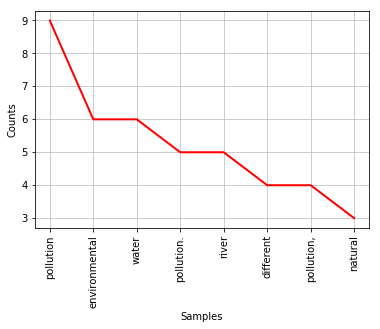

In [85]:
freq.plot(8, cumulative=False,c='r')


<a id='Important tasks of NLP'></a>
## 4. Important tasks of NLP

This section talks about different use cases and problems in the field of natural language processing.

<a id='Text Classification'></a>
__4.1 Text Classification__

Text classification is one of the classical problem of NLP. Notorious examples include – _Email Spam Identification, topic classification of news, sentiment classification and organization of web pages by search engines_.

Text classification, in common words is defined as a technique to systematically classify a text object (document or sentence) in one of the fixed category. It is really helpful when the amount of data is too large, especially for organizing, information filtering, and storage purposes.

A typical natural language classifier consists of two parts: (a) Training (b) Prediction as shown in image below. Firstly the text input is processes and features are created. The machine learning models then learn these features and is used for predicting against the new text.

<img src='./Images/image-5.png'>

Here is a code that uses naive bayes classifier using text blob library (built on top of nltk).

In [12]:
from textblob.classifiers import NaiveBayesClassifier as NBC
from textblob import TextBlob

training_corpus = [
                   ('I am exhausted of this work.', 'Class_B'),
                   ("I can't cooperate with this", 'Class_B'),
                   ('He is my badest enemy!', 'Class_B'),
                   ('My management is poor.', 'Class_B'),
                   ('I love this burger.', 'Class_A'),
                   ('I hate baseball.', 'Class_B'),
                   ('This is an brilliant place!', 'Class_A'),
                   ('I feel very good about these dates.', 'Class_A'),
                   ('This is my best work.', 'Class_A'),
                   ("What an awesome view", 'Class_A'),
                   ("cricket is awesome", 'Class_A'),
                   ('I do not like this dish', 'Class_B')]
test_corpus = [
                ("I am not feeling well today.", 'Class_B'), 
                ("I feel brilliant!", 'Class_A'), 
                ('Gary is a friend of mine.', 'Class_A'), 
                ("I can't believe I'm doing this.", 'Class_B'), 
                ('The date was good.', 'Class_A'), 
    ('I do not enjoy my job', 'Class_B')]

model = NBC(training_corpus) 
print(model.classify("cricket is a game."))

Class_A


In [13]:
ahmead = [('I am exhausted of this work.', 'Class_B'), 
           ('This is my best work.', 'Class_A')]

In [95]:
print(model.classify("cricket is eleven players game"))

Class_A


In [15]:
print(model.accuracy(test_corpus) * 100,"%") 

83.33333333333334 %


<a id='Coreference Resolution'></a>
## 4.3 Coreference Resolution

Coreference Resolution is a process of finding relational links among the words (or phrases) within the sentences. Consider an example sentence: ” Donald went to John’s office to see the new table. He looked at it for an hour.“

Humans can quickly figure out that “he” denotes Donald (and not John), and that “it” denotes the table (and not John’s office). Coreference Resolution is the component of NLP that does this job automatically. It is used in document summarization, question answering, and information extraction. Stanford CoreNLP provides a python wrapper for commercial purposes.

 
<a id='Other'></a>
## 4.4 Other NLP problems / tasks

- Text Summarization – Given a text article or paragraph, summarize it automatically to produce most important and relevant sentences in order.

- Machine Translation – Automatically translate text from one human language to another by taking care of grammar, semantics and information about the real world, etc.

- Natural Language Generation and Understanding – Convert information from computer databases or semantic intents into readable human language is called language generation. Converting chunks of text into more logical structures that are easier for computer programs to manipulate is called language understanding.

- Optical Character Recognition – Given an image representing printed text, determine the corresponding text.

- Document to Information – This involves parsing of textual data present in documents (websites, files, pdfs and images) to analyzable and clean format.
 
<a id='Important Libraries'></a>
## 5. Important Libraries for NLP (python)

- Scikit-learn: Machine learning in Python
- Natural Language Toolkit (NLTK): The complete toolkit for all NLP techniques.
- Pattern – A web mining module for the with tools for NLP and machine learning.
- TextBlob – Easy to use nl p tools API, built on top of NLTK and Pattern.
- spaCy – Industrial strength N LP with Python and Cython.
- Gensim – Topic Modelling for Humans
- Stanford Core NLP – NLP services and packages by Stanford NLP Group.